<a href="https://colab.research.google.com/github/tawseeq1/makemore/blob/main/mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!git clone https://github.com/karpathy/makemore.git

Cloning into 'makemore'...
remote: Enumerating objects: 64, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 64 (delta 20), reused 16 (delta 16), pack-reused 41 (from 1)
Receiving objects: 100% (64/64), 123.29 KiB | 1.15 MiB/s, done.
Resolving deltas: 100% (36/36), done.


In [3]:
words = open('makemore/names.txt', 'r').read().splitlines()

In [4]:
chs = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i, s in enumerate(chs)}
stoi['.'] = 0
itos = {i:s for s, i in stoi.items()}

In [5]:
words[0]

'emma'

In [6]:
block_size = 3
X, Y = [], []
for w in words[:5]:
  print(w)
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    print(''.join(itos[i] for i in context), '-->', ch)
    context = context[1:] + [ix]

X = torch.tensor(X)
Y = torch.tensor(Y)

emma
... --> e
..e --> m
.em --> m
emm --> a
mma --> .
olivia
... --> o
..o --> l
.ol --> i
oli --> v
liv --> i
ivi --> a
via --> .
ava
... --> a
..a --> v
.av --> a
ava --> .
isabella
... --> i
..i --> s
.is --> a
isa --> b
sab --> e
abe --> l
bel --> l
ell --> a
lla --> .
sophia
... --> s
..s --> o
.so --> p
sop --> h
oph --> i
phi --> a
hia --> .


In [7]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([32, 3]), torch.int64, torch.Size([32]), torch.int64)

In [13]:
C = torch.rand((27, 2))

In [10]:
one_hot = F.one_hot(torch.tensor(5), num_classes=27).float()

In [14]:
one_hot @ C   # is equivalent to C[5]

tensor([0.9383, 0.6038])

In [16]:
C[5].shape

torch.Size([2])

In [21]:
C[[2, 1]]

tensor([[0.5252, 0.4215],
        [0.9591, 0.0681]])

In [32]:
C[X].shape

torch.Size([32, 3, 2])

In [24]:
C[torch.tensor([2, 1])]

tensor([[0.5252, 0.4215],
        [0.9591, 0.0681]])

In [34]:
X[13, 2]

tensor(1)

In [37]:
C[X][13, 2]

tensor([0.9591, 0.0681])

In [38]:
C[1]

tensor([0.9591, 0.0681])

In [40]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [41]:
W1 = torch.rand((6, 100))
b1 = torch.rand(100)

In [44]:
torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], 1).shape

torch.Size([32, 6])

In [46]:
torch.cat(torch.unbind(emb, 1), 1).shape

torch.Size([32, 6])

In [47]:
emb.view(32, 6).shape

torch.Size([32, 6])

In [49]:
emb.view(32, 6) == torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], 1)

tensor([[True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, T

In [54]:
emb.shape[0]

32

In [55]:
h = torch.tanh(emb.view(emb.shape[0],6) @ W1 + b1)

In [56]:
h.shape

torch.Size([32, 100])

In [57]:
W2 = torch.rand((100, 27))
b2 = torch.rand(27)

In [58]:
logits = h @ W2 + b2

In [60]:
logits.shape

torch.Size([32, 27])

In [61]:
counts = logits.exp()

In [62]:
prob = counts / counts.sum(1, keepdims=True)

In [66]:
prob[0].sum()

tensor(1.)

In [71]:
loss = -prob[torch.arange(32), Y].log().mean()

In [72]:
loss

tensor(5.1384)

In [69]:
torch.arange(32)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [67]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

Karpathy says below is more respectable :)

In [105]:
block_size = 3
X, Y = [], []
for w in words:
  # print(w)
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    # print(''.join(itos[i] for i in context), '-->', ch)
    context = context[1:] + [ix]

X = torch.tensor(X)
Y = torch.tensor(Y)

In [107]:
X.shape, Y.shape

(torch.Size([228146, 3]), torch.Size([228146]))

In [158]:
g = torch.Generator().manual_seed(2147483647)
C = torch.rand((27, 2), generator=g)
W1 = torch.rand((6, 100), generator=g)
b1 = torch.rand(100, generator=g)
W2 = torch.rand((100, 27), generator=g)
b2 = torch.rand(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [134]:
sum(p.nelement() for p in parameters)

3481

In [132]:
lre= torch.linspace(-3, 0, 1000)
lrs = 10**lre
lrs

tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0013, 0.0013, 0.0013,
        0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
        0.0015, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016,
        0.0016, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0019,
        0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0020, 0.0020,
        0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0021, 0.0021, 0.0021, 0.0021,
        0.0021, 0.0021, 0.0021, 0.0022, 

In [155]:
for p in parameters:
  p.requires_grad = True

lri = []
loss_s = []

for i in range(1000):
  ix = torch.randint(0, X.shape[0], (32,))
  #forward
  emb = C[X[ix]]
  h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
  logits = h @ W2 + b2
  # counts = logits.exp()
  # prob = counts / counts.sum(1, keepdims=True)
  # loss = -prob[torch.arange(32), Y].log().mean()
  loss = F.cross_entropy(logits, Y[ix])  # == loss  , because using cross_entropy is much more efficient for forward and backward pass
  #print(loss.item ())
  #backward
  for p in parameters:
    p.grad = None
  loss.backward()
  #update
  # lr = lrs[i]
  lr = 0.01   # we used 0.1 initially, now we will be using 0.01
  for p in parameters:
    p.data += -lr * p.grad
  # lri.append(lr)
  # loss_s.append(loss.item())
print(loss.item())

2.2622711658477783


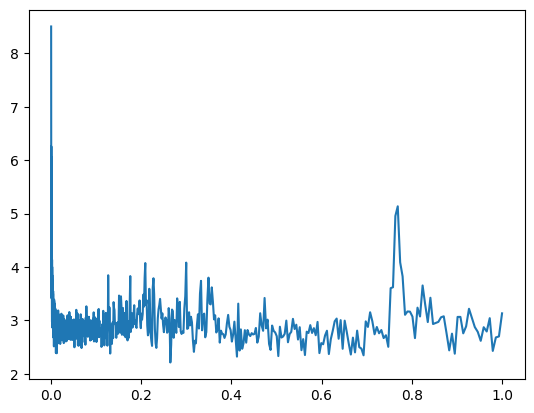

In [138]:
plt.plot(lri, loss_s)

In [117]:
 X.shape[0]

228146

In [126]:
torch.randint(0, X.shape[0], (32,))

tensor([216291, 168890, 194684, 124842,  89205, 217187,  89200, 169397, 220625,
         22352, 157589, 165704, 152948, 143096, 156075,  62899,  33400,  27155,
        201471,  56997, 196766,  41813, 174642,  79368, 220238,  55512,  53637,
         16288, 166644, 147380,  99255, 193863])

General function

In [157]:
def build_dataset(words):
  block_size = 3
  X, Y = [], []
  for w in words:
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      context = context[1:] + [ix]

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = (0.8 * len(words))
n2 = (0.9 * len(words))
Xtr, Ytr = build_dataset(words[:int(n1)])
Xdev, Ydev = build_dataset(words[int(n1):int(n2)])
Xte, Yte = build_dataset(words[int(n2):])

torch.Size([182580, 3]) torch.Size([182580])
torch.Size([22767, 3]) torch.Size([22767])
torch.Size([22799, 3]) torch.Size([22799])


In [187]:
g = torch.Generator().manual_seed(2147483647)
C = torch.rand((27, 10), generator=g)
W1 = torch.rand((30, 200), generator=g)
b1 = torch.rand(200, generator=g)
W2 = torch.rand((200, 27), generator=g)
b2 = torch.rand(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [188]:
sum(p.nelement() for p in parameters)

11897

In [189]:
lri = []
lossi = []
stepi = []
for p in parameters:
  p.requires_grad = True

In [194]:
for i in range(50000):
  ix = torch.randint(0, Xtr.shape[0], (32,))
  #forward
  emb = C[Xtr[ix]]
  h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
  logits = h @ W2 + b2
  # counts = logits.exp()
  # prob = counts / counts.sum(1, keepdims=True)
  # loss = -prob[torch.arange(32), Y].log().mean()
  loss = F.cross_entropy(logits, Ytr[ix])  # == loss  , because using cross_entropy is much more efficient for forward and backward pass
  #print(loss.item ())
  #backward
  for p in parameters:
    p.grad = None
  loss.backward()
  #update
  # lr = lrs[i]
  lr = 0.01   # we used 0.1 initially, now we will be using 0.01
  for p in parameters:
    p.data += -lr * p.grad
  # lri.append(lr)
  stepi.append(i)
  lossi.append(loss.log10().item())
# print(loss.item()) # gives us the loss for a batch

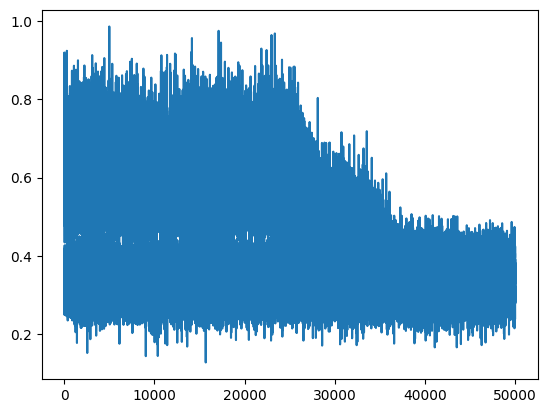

In [195]:
plt.plot(stepi, lossi)

In [196]:
emb = C[Xtr]
h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.1649, grad_fn=<NllLossBackward0>)

In [197]:
emb = C[Xdev]
h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.1863, grad_fn=<NllLossBackward0>)

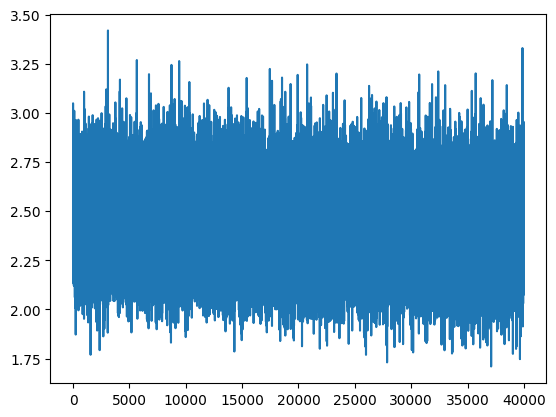

In [175]:
plt.plot(stepi, loss_s)

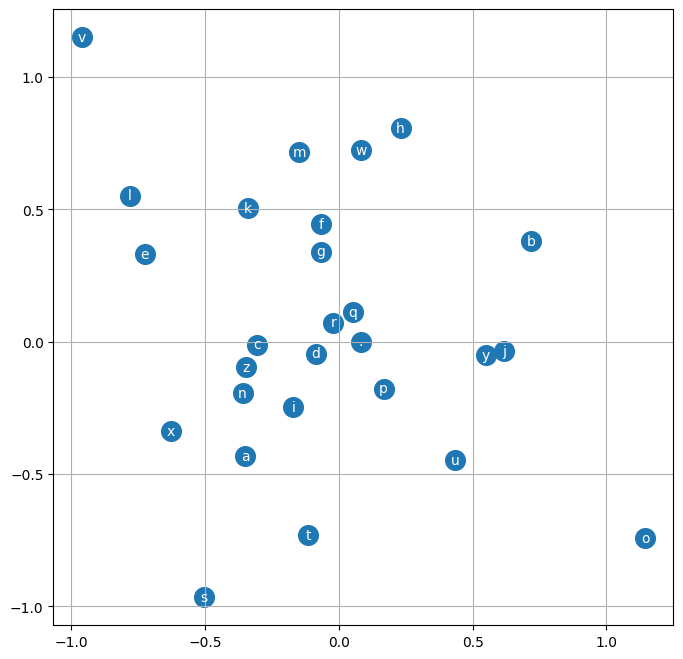

In [198]:
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
  plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [201]:
g = torch.Generator().manual_seed(7632487826)
for i in range(20):
  out = []
  context = [0] * block_size
  while True:
    emb = C[torch.tensor([context])]
    h = torch.tanh(emb.view(1, -1) @ W1 + b1)
    logits = h @ W2 + b2
    probs = F.softmax(logits, dim=1)
    ix = torch.multinomial(probs, num_samples=1, replacement=True, generator=g).item()
    context = context[1:] + [ix]
    out.append(ix)
    if ix == 0:
      break
  print(''.join(itos[i] for i in out))

juruna.
clan.
dere.
jitgan.
ize.
aby.
asir.
addin.
chra.
sharlo.
cosorrin.
haala.
milomreo.
shatter.
hadillisa.
jase.
amelyn.
gyon.
osf.
kalee.
